In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name = 1)

In [3]:
#shape of data
data.shape

(5000, 14)

In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#preparing independent and dependent variables
y = data['Personal Loan']
x = data.drop(['Personal Loan'], axis = 1)

In [7]:
#importing train test split to create validation set
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 101, stratify = y, test_size = 0.25)

In [9]:
#distribution in training dataset
y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [10]:
y_valid.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [11]:
x_train.shape, y_train.shape

((3750, 13), (3750,))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
#creating a decission tree function
dt_model = DecisionTreeClassifier(random_state = 10)

In [15]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [16]:
#checking the training score
dt_model.score(x_train, y_train)

1.0

In [17]:
dt_model.score(x_valid, y_valid)

0.9784

In [18]:
dt_model.predict(x_valid)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
dt_model.predict_proba(x_valid)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [20]:
y_pred = dt_model.predict_proba(x_valid)[:,1]

In [21]:
new_y=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_valid, new_y)

0.9784

## changing the max depth

In [24]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    validation_accuracy.append(dt_model.score(x_valid, y_valid))

In [25]:
frame = pd.DataFrame({'max_depth': range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.904000,0.9040
1,2,0.966667,0.9688
2,3,0.983733,0.9816
3,4,0.984533,0.9824
4,5,0.992000,0.9816


No handles with labels found to put in legend.


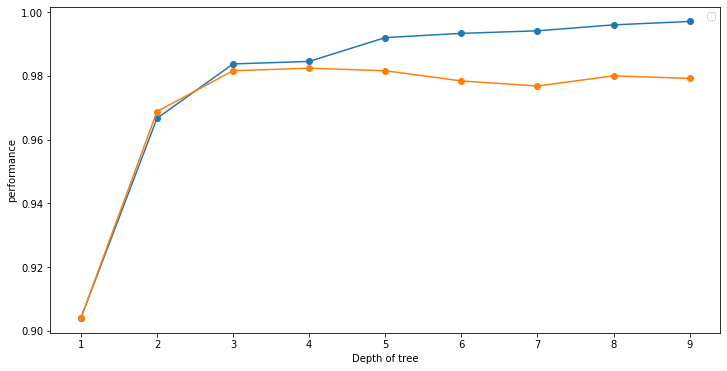

In [26]:
plt.figure(figsize = (12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [27]:
dt_model = DecisionTreeClassifier(max_depth = 8, max_leaf_nodes = 25, random_state = 10)

In [28]:
#fitting the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [29]:
#Training the score
dt_model.score(x_train, y_train)

0.9941333333333333

In [30]:
#validation score
dt_model.score(x_valid, y_valid)

0.9816

In [31]:
from sklearn import tree

In [44]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree0.dot', feature_names = x_train.columns, max_depth = 5,filled = True)

In [46]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot', feature_names = x_train.columns, max_depth = 2,filled = True)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [50]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features = 2, oob_score = True)

In [51]:
features = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Securities Account","CD Account","Online","CreditCard"]

In [53]:
rf_model.fit(X = data[features], y = data["Personal Loan"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
print("oob Accuracy: ")
print(rf_model.oob_score_);

oob Accuracy: 
0.9872


Find important variables

In [55]:
for feature, imp in zip(features,rf_model.feature_importances_):
    print(feature,imp);

Age 0.04367124171644922
Experience 0.04325833272132936
Income 0.34544497830799104
Family 0.09866057595412894
CCAvg 0.17707372856103015
Education 0.1720284924152762
Mortgage 0.0426416951827029
Securities Account 0.005444891523873143
CD Account 0.05378767367725272
Online 0.008348965020907742
CreditCard 0.009639424919058571


In [57]:
predictors1 = pd.DataFrame([data["Income"],data["CCAvg"],data["Education"]]).T

In [59]:
dt_model.fit(X = predictors1, y = data["Personal Loan"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [61]:
with open("banktree.dot",'w') as f:
    f = tree.export_graphviz(dt_model, feature_names = ["Income","CCAvg","Education"], out_file = f);

In [62]:
dt_model.score(X = predictors1, y = data["Personal Loan"])

0.9754